In [119]:
#Þurfum líklega ekki öll þessi import. Sumt er copy-paste
import nltk
import re
import json
import urllib.request
import pandas as pd 
import numpy as np
from nltk.corpus import PlaintextCorpusReader
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
import re
import io
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import defaultdict
import math

In [3]:
# nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
#Create the corpus
corpus_root = 'cleanCheck'
newcorpus = PlaintextCorpusReader(corpus_root, '.*')

In [135]:
#Create DataFrame and read all attributes from csv
df_characters = pd.DataFrame()
df_characters = pd.read_csv("ZeldaBotW_nodes_w_attributes_enriched.csv")

In [137]:
df_characters

,Name,Role,Race,Gender
0,Baddek,Ally,Hylian,Male
1,Bamboo,Ally,Horse,Unknown
2,Banji,Ally,Hylian,Female
3,Baumar,Ally,Hylian,Male
4,Bayge,Ally,Goron,Male
...,...,...,...,...
651,Waterblight Ganon,Boss,Unknown,Unknown
652,Master Kohga,Boss,Sheikah,Male
653,Monk Maz Koshia,Boss,Sheikah,Male
654,Calamity Ganon,Boss,Gerudo,Male


In [133]:
# df_characters.drop(df_characters[(df_characters['Name'] == "Baddek")].index, inplace=True)

In [16]:
#Hérna var ég að spá í að gera nýtt df fyrir hvert race sem þarf að nota
df_Hylian = df_characters.loc[(df_characters['Race'] == 'Hylian')]
df_Zora = df_characters.loc[(df_characters['Race'] == 'Zora')]
df_Goron = df_characters.loc[(df_characters['Race'] == 'Goron')]
df_Gerudo = df_characters.loc[(df_characters['Race'] == 'Gerudo')]
df_Rito = df_characters.loc[(df_characters['Race'] == 'Rito')]

In [40]:
names = df_characters.Name.values
hylians = df_Hylian.Name.values
zoras = df_Zora.Name.values
gorons = df_Goron.Name.values
gerudos = df_Gerudo.Name.values
ritos = df_Rito.Name.values

In [8]:
baseurl = "https://zelda.fandom.com/api.php?"
action = "action=query"
# titleCharacters = "titles=Characters_in_Breath_of_the_Wild"
# titleEnemies = "titles=Enemies_in_Breath_of_the_Wild"
# titleBosses = "titles=Bosses_in_Breath_of_the_Wild"
title = "titles="
content="prop=extracts&exlimit=1&explaintext"
dataformat = "format=json"

tokenizer = RegexpTokenizer(r'\w+')

In [9]:
for index, row in df_characters.iterrows():
    row['Name'] = row['Name'].replace(" ", "_")
    name = urllib.parse.quote_plus(row['Name'])
    title = "titles=" + name

    query1 = "{}{}&{}&{}&{}".format(baseurl, action, content, title , dataformat)
    wikiresponse1 = urllib.request.urlopen(query1)
    wikidata1 = wikiresponse1.read()
    wikitext1 = wikidata1.decode('utf-8')
    response = json.loads(wikitext1)
    pageid =list(response['query']['pages'].keys())[0]
    responseContent = response['query']['pages'][pageid]['extract']
    
    text_file = open("newtxt/" + row['Name'] + ".txt", "wt", encoding="utf-8")
    n = text_file.write(responseContent)
    text_file.close()

In [151]:
#CLEANING THE TEXT FILES - WEEK 7

stop_words = set(stopwords.words('english'))
tokenizer = RegexpTokenizer(r'\w+')
wnl = nltk.WordNetLemmatizer()

# more_stopwords = {'oh', 'will', 'hey', 'yet', ...}
# STOPWORDS = STOPWORDS.union(more_stopwords)

print (stop_words)

for name in names:
    file1 = open("newtxt copy/" + name + ".txt")

    # Use this to read file content as a stream:
    theText = file1.read()

    # Regex
    theText = re.sub('==.*?==', '', theText)
    theText = re.sub('=', '', theText)
    theText = re.sub('character', '', theText)
#     theText = re.sub('Breath', '', theText)
    theText = re.sub('Wild', '', theText)
    theText = re.sub('Zelda', '', theText)  
    
    # Remove every name from every text file
    for test in names:
        theText = re.sub(test, '', theText)

    # Removing punctuations
    words = tokenizer.tokenize(theText)

    stringToWrite = ""
    for r in words:
        #Setting to lowercase
        r = r.lower()
        
        
        if not r in stop_words:
            stringToWrite += " " + r
        
        # Lemmatization
        r = wnl.lemmatize(r)
        
    with open("newtxt copy/" + name + ".txt",'r+') as myfile:
        data = myfile.read()
        myfile.seek(0)
        myfile.write(stringToWrite)
        myfile.truncate()
                        
#             appendFile = open("cleanCheck/" + name + ".txt",'a')
#             appendFile.write(" "+r)
#             appendFile.close()

{'did', "shan't", 'during', 'than', 'yours', 'ain', 'been', 'with', 'no', 'what', 'aren', 'hasn', "wasn't", 'that', 'didn', 'and', 'his', 'he', 'ourselves', "mustn't", "you've", 'there', 'down', 'same', 'both', 'all', 'why', 'it', 'again', 'once', 'where', 'couldn', 'themselves', "couldn't", 'we', 'o', 'my', 'just', 'this', 'shan', 'you', 'a', "needn't", 'off', "you're", 'below', 'has', "wouldn't", 'but', 'him', 'to', 'needn', 'into', 'their', "isn't", 'any', 'more', 'hers', 'does', 'were', 'other', 'hadn', 'as', 'most', 'y', 'm', 'who', 'won', 'herself', 'over', 'her', "hasn't", 'then', 'own', "she's", 'the', 'she', 'after', 'until', 'at', 'so', 'yourselves', "mightn't", 'having', 'while', 'them', 'i', 'shouldn', 'mustn', 'some', 'ours', 'if', 'each', 'can', 'am', 'are', 'out', 'haven', 'have', 'do', 'was', 'about', 'above', 'myself', 'when', 'had', 'in', 'an', 'be', 'very', 'under', 'which', "aren't", "that'll", 'further', "weren't", 'theirs', 'or', 'up', 'our', 'wasn', "haven't", "d

KeyboardInterrupt: 

In [465]:
file_list = []
for name in names:
    file_list.append(name + ".txt")
# print(file_list)

# for file in file_list:
#     print(file)

In [75]:
# Calculate TC-IDF ranking
def calcRate(namesInRace):
    wordsInRace = defaultdict(list)
    appearsInCorpus = defaultdict(list)
    
    for name in namesInRace:
        theText = nltk.Text(newcorpus.words(name + '.txt'))
        
#         len(nltk.Text(newcorpus.words(name + '.txt')))
        
        fdist = FreqDist(theText)
        
        for word in fdist:
            wordTC = fdist[word]
                
            wordsInRace[word].append(wordTC)
            appearsInCorpus[word].append(name)
    
    superstring = ""
    for key, value in wordsInRace.items():
        TC = sum(value)
        IDF = math.log(len(namesInRace) / len(appearsInCorpus[key]))

        TCIDF = math.ceil(TC*IDF)
        
        superstring += (key + " ") * TCIDF

    return superstring

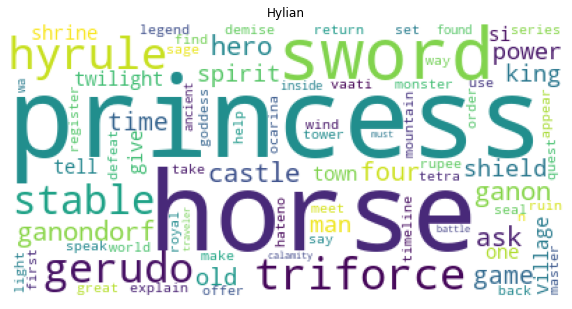

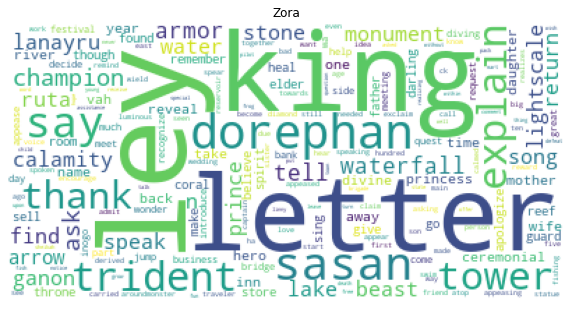

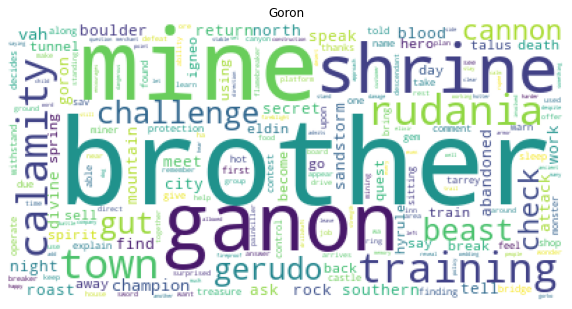

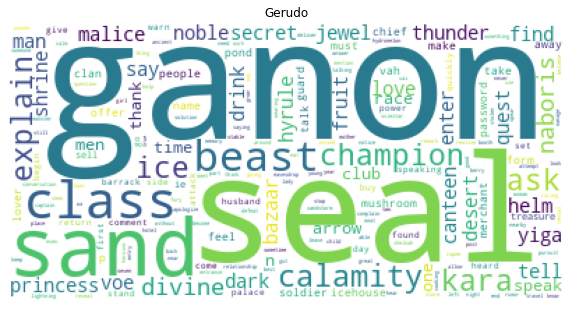

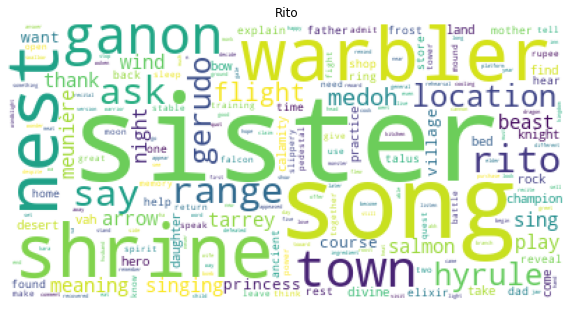

In [150]:
hyliansCloud = calcRate(hylians)
zorasCloud = calcRate(zoras)
goronsCloud = calcRate(gorons)
gerudosCloud = calcRate(gerudos)
ritosCloud = calcRate(ritos)

plt.figure( figsize=(10,6))
wordcloud = WordCloud(background_color="white", max_words=80, collocations = False).generate(hyliansCloud)
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Hylian")
plt.show()

plt.figure( figsize=(10,6))
wordcloud = WordCloud(background_color="white", collocations = False).generate(zorasCloud)
img=plt.imshow(wordcloud)
plt.axis("off")
plt.title("Zora")
plt.show()

plt.figure( figsize=(10,6))
wordcloud = WordCloud(background_color="white", collocations = False).generate(goronsCloud)
img=plt.imshow(wordcloud)
plt.axis("off")
plt.title("Goron")
plt.show()

plt.figure( figsize=(10,6))
wordcloud = WordCloud(background_color="white", collocations = False).generate(gerudosCloud)
img=plt.imshow(wordcloud)
plt.axis("off")
plt.title("Gerudo")
plt.show()

plt.figure( figsize=(10,6))
wordcloud = WordCloud(background_color="white", collocations = False).generate(ritosCloud)
img=plt.imshow(wordcloud)
plt.axis("off")
plt.title("Rito")
plt.show()

Create a word-cloud for each race of the five champions of Hyrule (i.e. Hylian, Zora, Goron, Gerudo, and Rito) according to either TC-IDF. Feel free to make it as fancy as you like. Explain your process and comment on your results.

We create a word-cloud for each of the five champions' race. Firstly a Pandas DataFrame is created, it is then used to make an array of all the names.
We create another 5 DataFrames containing only information on characters in a specific race. Five smaller name-arrays are made, one for each DataFrame. 
The original name array is used to loop over all the text files in a subfolder. At this point all the text files are cleaned. 
- remove everything between ==
- remove every character names from the text files.
- tokenize the text and remove punctuations
- make every word lowercase
- remove stop words (such as what, no, but, to, an, be, by ...)
- lemmatize words. Make sure the words are in the right manners, as in the dictionary.
The newly cleaned string is then written to a text file - for every name in the name-array.

Next the TC-IDF is calculated.
And lastly a word cloud is created for each race. 5 in total.